In [1]:
import pandas as pd
from underthesea import word_tokenize
import regex as re

import itertools
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

import pickle

## I. Tiền xử lý dữ liệu

In [72]:
df

,text,domain,label
0,Thủ tướng Abe cúi đầu xin lỗi vì hành động phi...,binhluan.biz,1
1,Thủ tướng Nhật cúi đầu xin lỗi vì tinh thần ph...,www.ipick.vn,1
2,Choáng! Cơ trưởng đeo khăn quàng quẩy banh nóc...,tintucqpvn.net,1
3,Chưa bao giờ nhạc Kpop lại dễ hát đến thế!!!\n...,tintucqpvn.net,1
4,"Đại học Hutech sẽ áp dụng cải cách ""Tiếq Việt""...",www.gioitreviet.net,1
...,...,...,...
218,“Siêu máy bay” A350 sẽ chở CĐV Việt Nam đi Mal...,dantri.com.vn,0
219,Thưởng 20.000 USD cho đội tuyển cờ vua Việt Na...,dantri.com.vn,0
220,Trường Sơn giành HCV tại giải cờ vua đồng đội ...,dantri.com.vn,0
221,Chuyện về chàng sinh viên Luật - Kiện tướng Lê...,dantri.com.vn,0


In [74]:
df=pd.read_csv("vn_news_223_tdlfr.csv")
with open("vietnamese-stopwords.txt", encoding = "utf8", errors ='replace') as f_st:
    stop_word=f_st.read().split("\n")
df.text[4]

'Đại học Hutech sẽ áp dụng cải cách "Tiếq Việt" vào năm học 2018?\nMới đây, ông Phạm Ngọc Thanh, Phó giám đốc Sở GD – ĐT Tp. Hồ Chí Minh chuyên trách về Hệ giáo dục Đại học tại thành phố đã lên tiếng về vấn đề cải cách tiếng Tiếng Việt của PGS.TS Bùi Hiền.\nÔng cho biết TP.HCM đặc biệt quan tâm đến đề xuất của PGS và rất sẵn lòng thí điểm vào giảng dạy tại các trường Đại học trên địa bàn TP.HCM.\nÔng Phạm Ngọc Thanh, Phó Giám đốc Sở GDĐT TP.HCM.\nPhó giám đốc Sở GDĐT TP.HCM Phạm Ngọc Thanh chia sẻ rằng TP.HCM là thành phố phát triển với số lượng người nước ngoài cư trú, làm việc và học tập nhiều nhất cả nước. Rất nhiều người trong số đó mong muốn được học Tiếng Việt để giúp ích cho việc sinh sống và làm việc tại Việt Nam một cách thuận tiện hơn. Tuy nhiên, với cấu trúc ngữ pháp cũng như cách phát âm phức tạp của bộ chữ hiện tại thì khá khó khăn để người nước ngoài có thể học tập.\nSau khi xem xét và tìm hiểu toàn bộ nghiên cứu và đề xuất cải tiến bảng chữ cái Tiếng Việt của PGS.TS Bùi 

In [3]:
def preprocess_line(a):
    a=a.lower()
    a=re.sub(r'[^\w\s]','', a)
    a=a.replace('\n',' ')
    for i in stop_word:
        temp=' '+i+' '
        if temp in a:
            a=a.replace(temp,' ')
    a=word_tokenize(a)
    return a

In [4]:
def preprocess(t):
    for i in range(len(t)):
        t[i]=preprocess_line(t[i])
    return t

In [5]:
preprocess(df.text)

0      [thủ tướng, abe, cúi, đầu, lỗi, hành động, phi...
1      [thủ tướng, nhật, cúi, đầu, lỗi, tinh thần, ph...
2      [choáng, trưởng, đeo, khăn quàng, quẩy, banh, ...
3      [chưa, nhạc, kpop, hát, giáo sư, nguyễn lân, d...
4      [đại học, hutech, áp dụng, cải, tiếq, việt, họ...
                             ...                        
218    [siêu, máy bay, a350, chở, cđv, việt, nam, đi,...
219    [thưởng, 20000, usd, đội tuyển, cờ vua, việt, ...
220    [trường sơn, giành, hcv, giải, cờ vua, đồng độ...
221    [chuyện, chàng, sinh viên, luật, kiện tướng, l...
222    [tiền đạo, malaysia, hàng, thủ, đội tuyển, việ...
Name: text, Length: 223, dtype: object

In [6]:
fea = []
for i in df.text:
    for j in i:
        if j not in fea:
            fea.append(j)
print(len(fea))

8151


In [7]:
#numeric
def numerics(list_text,fea):
    matrix = []
    for i in list_text:
        tmp = []
        for j in fea:
            if j in i:
                tmp.append(1)
            else:
                tmp.append(0)
        matrix.append(tmp)
    df1 = pd.DataFrame(matrix, columns= fea)
    return df1

In [8]:
df1=numerics(df.text,fea)
df1.head()

,thủ tướng,abe,cúi,đầu,lỗi,hành động,phi,thể thao,tuyển,nhật,...,song song,tiền đạo,norshahrul,idlan,talaha,đtqg,bharian,bổ ích,h45,hlong
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### II. EDA - Khai phá tập dữ liệu:

#### Phân bố của các nhãn

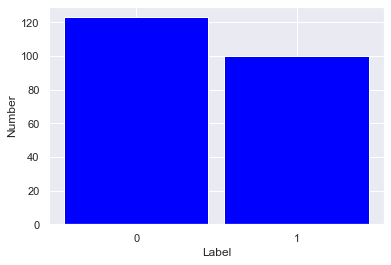

In [9]:
plt.bar([0,1], df.groupby(['label']).size().values, 0.9,  color="blue")
plt.xticks([0,1], [0,1])
plt.xlabel('Label')
plt.ylabel('Number')
plt.show()

Số lượng giữa tin giả và tin thật khá đồng đều nhau.

### Tương quan độ dài của text giữa hai nhãn 0 và 1

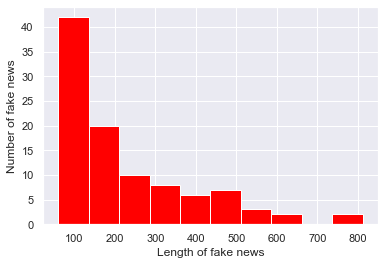

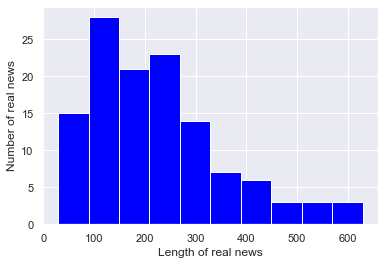

In [10]:
fake_news=df[df['label']==1]['text']
plt.hist([len(i) for i in fake_news],color='red')
plt.xlabel('Length of fake news')
plt.ylabel('Number of fake news')
plt.show()
real_news=df[df['label']==0]['text']
plt.hist([len(i) for i in real_news],color='blue')
plt.xlabel('Length of real news')
plt.ylabel('Number of real news')
plt.show()

Nhìn chung, tin thật có nhiều tin ngắn hơn tin giả.

### Số lượng tin giả, thật ở các domain

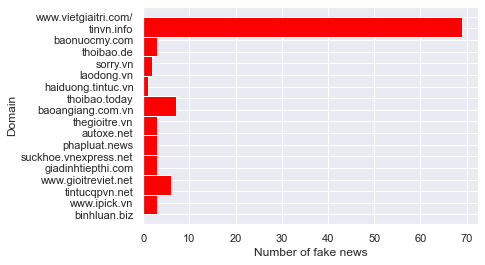

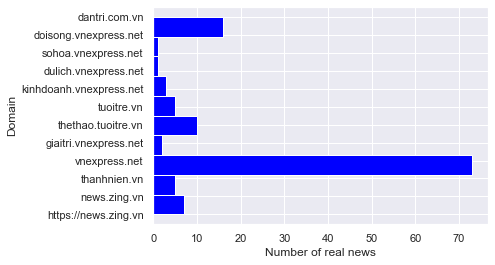

In [11]:
#Số lượng tin giả ở các domain
fake_news=df[df['label']==1]['domain']
fake_news.hist(color = "red",orientation='horizontal')
plt.xlabel('Number of fake news')
plt.ylabel('Domain')
plt.show()
#Số lượng tin thật ở các domain
real_news=df[df['label']==0]['domain']
real_news.hist(color = "blue",orientation='horizontal')
plt.xlabel('Number of real news')
plt.ylabel('Domain')
plt.show()

Từ biểu đồ ta có thể thấy tên miền www.vietgiaitri.com có nhiều tin giả nhất, vnexpress.net cung cấp nhiều tin thật nhất.

### III. Mô hình hóa dữ liệu

In [60]:
#Chia tập dữ liệu 
x_train,x_test,y_train,y_test=train_test_split(df1, df.label, test_size=0.2,random_state = 7)

### 1. Mô hình Passive Aggressive Classifier

In [61]:
#Khởi tạo PassiveAggressiveClassifier
model_pac = PassiveAggressiveClassifier(C = 0.5, max_iter=50)
model_pac.fit(x_train, y_train)

#Dự đoán trên test set và tính toán độ chính xác
test_pred_pac = model_pac.predict(x_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred_pac) * 100}%")  

Test Set Accuracy : 91.11111111111111%


In [62]:
#Dự đoán sample_1 
pred_1=model_pac.predict([x_test.iloc[10]])
print("Pred: ",pred_1)
print("Truth: ",y_test.iloc[10])
#Dự đoán sample_2 
pred_2=model_pac.predict([x_test.iloc[40]])
print("Pred: ",pred_2)
print("Truth: ",y_test.iloc[40])

Pred:  [0]
Truth:  1
Pred:  [1]
Truth:  1


In [65]:
model_pac=pickle.load(open('PassiveAgressive.pkl','rb'))

In [64]:
model_1 = 'PassiveAgressive.pkl'
pickle.dump(model_pac, open(model_1, 'wb'))





In [70]:
model_2 = 'LogicalRegressive.pkl'
pickle.dump(model_log, open(model_2, 'wb'))

In [66]:
sam = " thủ tướng cường đẹp trai, công khai toàn dân đẹp trai nhất xóm "
vectorize=numerics([preprocess_line(sam)], fea)
print(vectorize)
pred_1=model_pac.predict(vectorize)
print("Pred: ",pred_1)

   thủ tướng  abe  cúi  đầu  lỗi  hành động  phi  thể thao  tuyển  nhật  ...  \
0          1    0    0    0    0          0    0         0      0     0  ...   

   song song  tiền đạo  norshahrul  idlan  talaha  đtqg  bharian  bổ ích  h45  \
0          0         0           0      0       0     0        0       0    0   

   hlong  
0      0  

[1 rows x 8151 columns]
Pred:  [1]


### 2. Mô hình Logistic Regression

In [69]:
model_log = LogisticRegression(C=0.5,max_iter=50)
model_log.fit(x_train, y_train)
test_pred_log = model_log.predict(x_test)
print(f"Test Set Accuracy : {accuracy_score(y_test, test_pred_log) * 100}%")  

Test Set Accuracy : 91.11111111111111%


In [17]:
#Dự đoán sample_1 
pred_1=model_log.predict([x_test.iloc[10]])
print("Pred: ",pred_1)
print("Truth: ",y_test.iloc[10])
#Dự đoán sample_2 
pred_2=model_log.predict([x_test.iloc[40]])
print("Pred: ",pred_2)
print("Truth: ",y_test.iloc[40])

Pred:  [1]
Truth:  1
Pred:  [0]
Truth:  0


In [18]:
sam="Thủ tướng cường đẹp trai, công khai toàn dân đẹp trai nhất xóm"
sam=preprocess_line(sam)
print(sam)


['thủ tướng', 'cường', 'đẹp trai', 'công khai', 'toàn', 'dân', 'đẹp trai', 'xóm']


In [19]:
pred=model_log.predict(numerics([sam],fea))
print(pred)

[0]


In [20]:
def vector(list_input):
    return numerics([list_input],fea)



In [21]:
with open('fea.pkl','wb') as file:
    pickle.dump(fea,file)

In [22]:
# model=pickle.load(open('LogicalRegressive.pkl','rb'))
fe=pickle.load(open('fea.pkl','rb'))
print(fe)

['thủ tướng', 'abe', 'cúi', 'đầu', 'lỗi', 'hành động', 'phi', 'thể thao', 'tuyển', 'nhật', 'sankei', 'sports', 'shinzo', 'công khai', 'gửi', 'hoàng', 'toàn', 'dân', 'tinh thần', 'thi đấu', 'đội tuyển', 'world', 'cup', '2018', 'tối', 'lượt', 'trận', 'vòng', 'bảng', 'phụ', 'senegal', 'đội', 'thua', 'colombia', 'fairplay', 'thẻ', 'phạt', 'võ sĩ đạo', 'samurai', 'thượng võ', 'trích', 'bất bình', 'hình ảnh', 'kiên cường', 'đấu trường', 'quốc tế', 'đứng', 'thành', 'trách nhiệm', 'sâu sắc', 'nhân dân', 'nổi tiếng', 'chất', 'võ sĩ', 'đạo lý', 'áo', 'xanh', 'mệnh danh', 'nhiên', 'dội', 'hâm mộ', 'bóng đá', 'lối', 'bóng', 'tiêu cực', 'cố tình', 'câu', 'vé', 'đi', 'tiếp', 'phút', 'lan', 'thắng', 'tỷ', '10', 'tỉ', 'tương', 'cầu thủ', 'hề', 'gỡ', 'hòa', 'vui vẻ', '01', '16', 'fifa', 'fair', 'play', 'quy định', '1', 'thẻ vàng', '2', 'thẻ đỏ', '3', '4', '6', 'sợ', 'lãnh', 'giết', 'chết', 'đấu', 'liên tục', 'chuyền', 'sân', 'chí', '5', 'đối phương', 'bất chấp', 'la ó', 'huýt sáo', 'cđv', 'thầy trò', '

In [23]:
model_4 = 'dft.pkl'

In [24]:
vectorized= pickle.load(open(model_4, 'rb'))
sam = " thủ tướng cường đẹp trai, công khai toàn dân đẹp trai nhất xóm "
pred_1=model.predict(vectorized(preprocess_line(sam)))
print("Pred: ",pred_1)

NameError: name 'model' is not defined